### GEOG0051

Mining Social and Geographic Datasets
-----------------------------------

Coursework Part One
-------------------------------

Stephen Law and Nikki Tanu

## 2 Mobility Patterns Analysis in Cambridge

For the first task, you will be analysing the mobility patterns of users from Gowalla, a now-defunct online geo-social networkfrom a decade ago. On Gowalla, users were able to check in at different locations across the course of the day. The dataset that is provided to you (available on Moodle) is a subset of Gowalla users located in Cambridge, UK and, although with some personal identifiers of the users removed, you could trace the movements of particular individuals on certain days, according to their check-ins.

For  further  information,  the  entire  dataset  is  available  at https://snap.stanford.edu/data/loc-gowalla.html.

### 2.1 Format of Data

The variables contained in the dataset (which should be self-explanatory), provided in a .csv file, are:

* UserID, or the unique identifier of the user, e.g. 196514
* check-in-date, e.g. 2010-07-24
* check-in-time, e.g. 13:45:06
* latitude, e.g. 53.3648119
* longitude, e.g. -2.2723465833
* locid, or the unique identifier of the location, e.g. 145064

### Load and clean Gowalla dataset

In [1]:
# imports the various library for the lab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.cm as cm
#import matplotlib.colors as colors

In [2]:
# suppress warning 
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#load dataset
rawdf = pd.read_csv('Cambridge_gowalla.csv')
len(rawdf)

1871

In [4]:
# create a copy of the original dataset and clean the dataset
df = rawdf.copy()
df = df.drop_duplicates()
len(df) # 1871
df.head()

ID  User_ID        date      Time       lon        lat   loc_ID
0   1      382  12/09/2010  08:46:10  0.102380  52.173123  1307095
1   2     1050  14/08/2010  07:34:30  0.123451  52.197975  1735486
2   3     1050  14/08/2010  07:31:37  0.122774  52.197910   654162
3   4     1050  13/08/2010  21:07:46  0.116429  52.210057   516769
4   5     1050  13/08/2010  21:07:38  0.116200  52.210010    21381

### 2.2 Analysis Prompts

### 2.2.1 Visualise individual check-in locations

Visualise the check-in locations of the GC dataset for users with UserIDs `75027` and `102829` using the `Folium` library. Comment briefly on your findings of the locations visited by the 2 users, using any library that enables mapping. You should also comment briefly on the privacy implications of this type of analysis.

Note: This task primarily serves to help familiarise you with the dataset; we advise not to spend too long on it.


In [5]:
import networkx as nx
import osmnx as ox
import folium
import folium.plugins
from folium import FeatureGroup, LayerControl, Map, Marker, Icon, PolyLine

In [6]:
user1 = df[df['User_ID'] == 75027]
user1.iloc[:][['lon','lat','date']]
user1.describe()

ID  User_ID        lon        lat         loc_ID
count    67.000000     67.0  67.000000  67.000000      67.000000
mean   1221.000000  75027.0   0.143344  52.203252  368952.552239
std      19.485037      0.0   0.009057   0.009393  123857.771353
min    1188.000000  75027.0   0.122806  52.157223   31328.000000
25%    1204.500000  75027.0   0.141966  52.195771  373382.000000
50%    1221.000000  75027.0   0.144424  52.205200  374196.000000
75%    1237.500000  75027.0   0.146594  52.209822  395408.000000
max    1254.000000  75027.0   0.174108  52.222927  758004.000000

In [7]:
user2 = df[df['User_ID'] == 102829]
user2.iloc[:][['lon','lat','date']]
user2.head()
user2.describe()

ID   User_ID        lon        lat        loc_ID
count    75.000000      75.0  75.000000  75.000000  7.500000e+01
mean   1393.000000  102829.0   0.104032  52.206477  5.333699e+05
std      21.794495       0.0   0.015007   0.007267  3.528933e+05
min    1356.000000  102829.0   0.090578  52.194001  2.135600e+04
25%    1374.500000  102829.0   0.094001  52.196678  3.739830e+05
50%    1393.000000  102829.0   0.094001  52.209531  3.739830e+05
75%    1411.500000  102829.0   0.110910  52.212543  9.630000e+05
max    1430.000000  102829.0   0.137495  52.212543  1.173370e+06

In [8]:
# test the for loop
for i in range(len(user1)):
    lat = float(user1.iloc[i][['lat']])
    lon = float(user1.iloc[i][['lon']])
    coordinate = [lat, lon]
    print(coordinate)
    break

[52.21070073, 0.174108233]


In [9]:
user1_points = []
for i in range(len(user1)):
    lat = float(user1.iloc[i][['lat']])
    lon = float(user1.iloc[i][['lon']])
    coordinate = [lat, lon]
    user1_points.append(coordinate)
user2_points = []
for i in range(len(user2)):
    lat = float(user2.iloc[i][['lat']])
    lon = float(user2.iloc[i][['lon']])
    coordinate = [lat, lon]
    user2_points.append(coordinate)

In [10]:
# Create a map with the center as first point in the points list and set the zoom to 30
my_map = Map([52.204, 0.123], zoom_start=13)
# Add markers for each point
for p in user1_points:
        marker = Marker(p) # Creating a new marker
        icon = Icon(color='red')
        icon.add_to(marker) # Setting the marker's icon color 
        marker.add_to(my_map)
for p in user2_points:
        marker = Marker(p) # Creating a new marker
        icon = Icon(color='blue')
        icon.add_to(marker) # Setting the marker's icon color 
        marker.add_to(my_map)
        
# Display the map
my_map

### 2.2.2 Provide Characterisation of the Gowalla dataset

Provide a characterisation of the data available for the user `75027` on 30/01/2010 and for user `102829` on 11/05/2010, by visualising the paths for both users using the OSMnx library. Then, summarising your answers in a table in your report and compute, for each user:

* the maximum displacement (i.e. maximum distance between two consecutive locations they moved between);
* the average displacement (i.e. average distance between two consecutive locations/check-ins);
* the total distance travelled on the day;
* **Note**: All distances should be described in network distance, i.e.  the distances of paths along the street networks, rather than geographical distances without consideration of the street paths.


In [11]:
# data for user 75027 on 30/01/2010
user1.head()
user1['date'].unique()
user1p = user1[user1['date'] == '30/01/2010']
# change order based on time
user1data = user1p.sort_values(by='Time',axis=0,
                               ascending=True, inplace=False, 
                               na_position='last')
user1data

ID  User_ID        date      Time       lon        lat  loc_ID
1227  1228    75027  30/01/2010  15:13:43  0.173005  52.157223  477840
1226  1227    75027  30/01/2010  16:04:04  0.145606  52.204923   31968
1225  1226    75027  30/01/2010  16:06:57  0.144522  52.205200  478133
1224  1225    75027  30/01/2010  16:15:35  0.144826  52.205650  478191
1223  1224    75027  30/01/2010  16:59:45  0.146594  52.209822  373382
1222  1223    75027  30/01/2010  17:05:41  0.144786  52.209487  159331
1221  1222    75027  30/01/2010  17:20:55  0.144424  52.211325  374196
1220  1221    75027  30/01/2010  21:27:50  0.127612  52.198955   31328
1219  1220    75027  30/01/2010  22:14:11  0.123643  52.202858  473651

In [12]:
# data for user 102829 on 11/05/2010
user2p = user2[user2['date'] == '11/05/2010']
# change order based on time
user2data = user2p.sort_values(by='Time',axis=0,
                               ascending=True, inplace=False, 
                               na_position='last')
user2data

ID  User_ID        date      Time       lon        lat   loc_ID
1398  1399   102829  11/05/2010  06:30:18  0.110121  52.196113  1024097
1397  1398   102829  11/05/2010  07:24:49  0.094001  52.212543   373983
1396  1397   102829  11/05/2010  10:57:10  0.095404  52.211119  1031743
1395  1396   102829  11/05/2010  18:03:09  0.110528  52.196678   963000

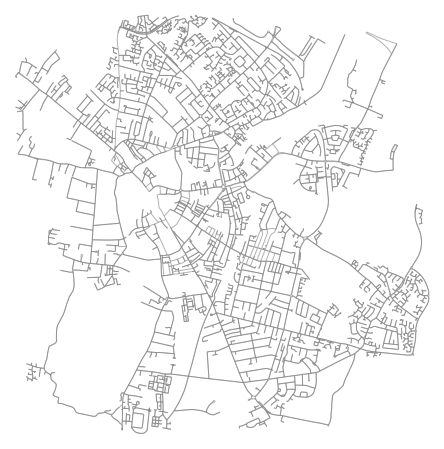

In [13]:
G=ox.graph_from_address('Mill Road Cemetery,Cambridge',dist=3500,network_type='drive')
fig, ax = ox.plot_graph(G, edge_color='grey', bgcolor='w', node_size=5,
                        edge_alpha=0.6, node_color='none')
plt.show()

In [14]:
origin_list = []
destination_list = []
for i in range(8):
    lat = user1data.iloc[i]['lat']
    lon = user1data.iloc[i]['lon']
    point = (lat, lon)
    origin_list.append(point)
for i in range(1, 9):
    lat = user1data.iloc[i]['lat']
    lon = user1data.iloc[i]['lon']
    point = (lat, lon)
    destination_list.append(point)

In [15]:
import seaborn as sns
sns.color_palette("OrRd", 14)
sns.color_palette("OrRd", 5)

[(0.9948327566320646, 0.8848904267589389, 0.7319953863898501),
 (0.9921568627450981, 0.7660130718954248, 0.5516339869281046),
 (0.9874356016916571, 0.550480584390619, 0.34797385620915033),
 (0.9058823529411765, 0.32679738562091504, 0.22875816993464054),
 (0.7468050749711649, 0.059792387543252584, 0.0386159169550173)]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


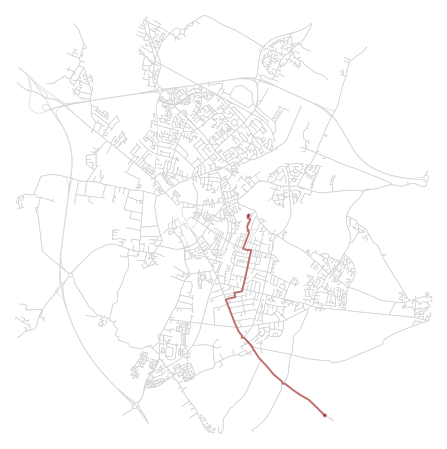

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


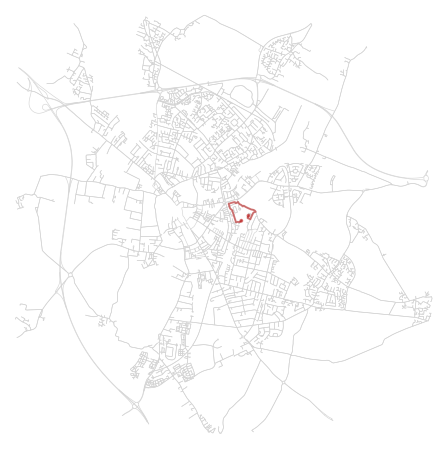

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


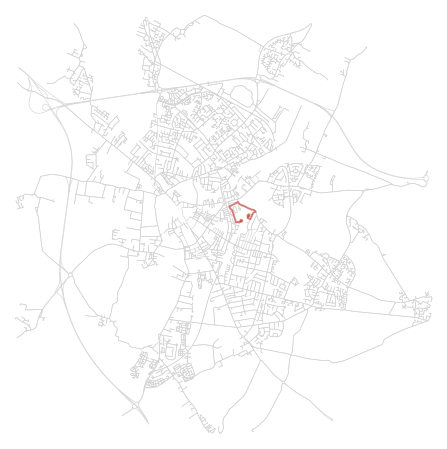

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


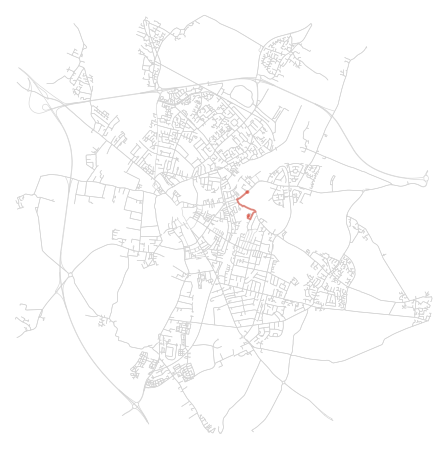

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


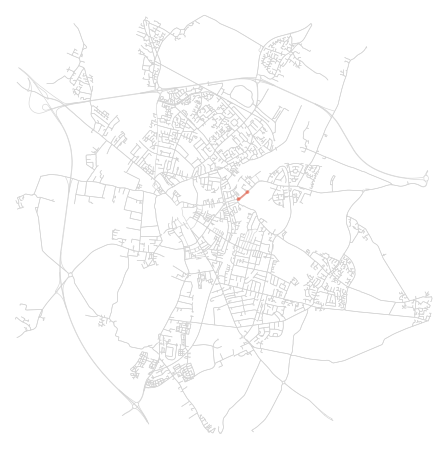

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


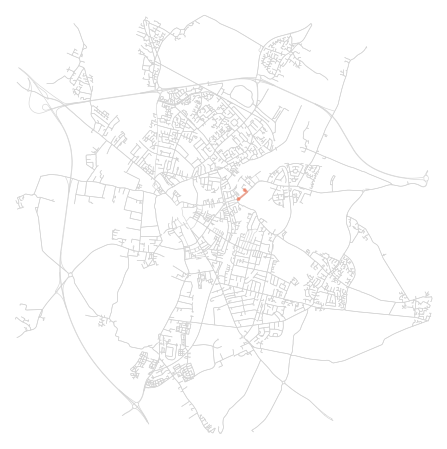

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


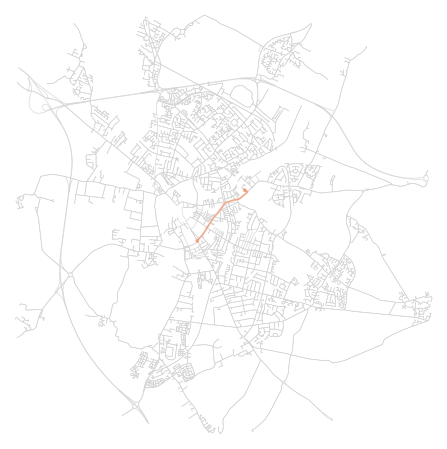

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


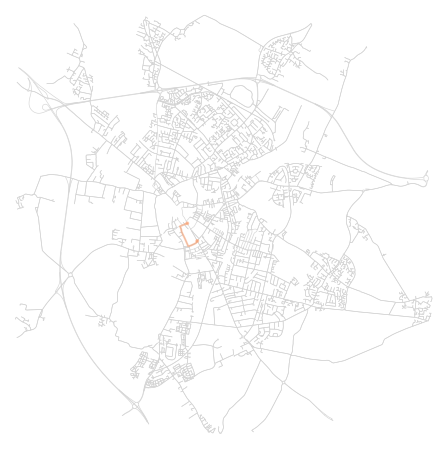

In [16]:
G1=ox.graph_from_address('Mill Road Cemetery,Cambridge',dist=5500,network_type='drive')
for i in range(8):
    # define origin/desination points then get the nodes nearest to each
    origin_point = origin_list[i]
    destination_point = destination_list[i]
    origin_node = ox.get_nearest_node(G1, origin_point)
    destination_node = ox.get_nearest_node(G1, destination_point)
    # find the shortest path between origin and destination nodes
    route = nx.shortest_path(G1, origin_node, destination_node, 
                             weight='length')
    color_list = list(sns.color_palette("OrRd", 14))[6:]
    color_list.reverse()
    fig, ax = ox.plot_graph_route(G1, route,
                                  edge_color='lightgrey', 
                                  bgcolor='w', edge_alpha=1, 
                                  node_color='none',edge_linewidth=0.6, 
                                  node_size=1, route_color = color_list[i],
                                  orig_dest_size=15, route_linewidth=2)
    fig.savefig("figure/CW1/1-%s.png"%i, bbox_inches='tight', pad_inches=0, dpi=300)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

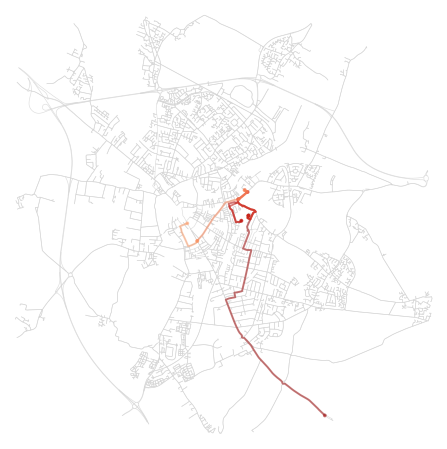

In [17]:
route_list = []
for i in range(8):
    # define origin/desination points then get the nodes nearest to each
    origin_point = origin_list[i]
    destination_point = destination_list[i]
    origin_node = ox.get_nearest_node(G1, origin_point)
    destination_node = ox.get_nearest_node(G1, destination_point)
    # find the shortest path between origin and destination nodes
    route = nx.shortest_path(G1, origin_node, destination_node, 
                             weight='length')
    route_list.append(route)

color_list = list(sns.color_palette("OrRd", 14))[6:]
color_list.reverse()
# plot the route showing origin/destination lat-long points   
fig, ax = ox.plot_graph_routes(G1, route_list, edge_color='lightgrey', 
                               bgcolor='w', edge_alpha=0.8, 
                               node_color='none',edge_linewidth=0.6, 
                               node_size=1, route_colors = color_list,
                               orig_dest_size=15, route_linewidth=2)
fig.savefig("figure/CW1/all-1.png", bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

In [18]:
sns.choose_colorbrewer_palette("sequential",as_cmap=True)

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

In [19]:
origin_list2 = []
destination_list2 = []
for i in range(3):
    lat = user2data.iloc[i]['lat']
    lon = user2data.iloc[i]['lon']
    point = (lat, lon)
    origin_list2.append(point)
for i in range(1, 4):
    lat = user2data.iloc[i]['lat']
    lon = user2data.iloc[i]['lon']
    point = (lat, lon)
    destination_list2.append(point)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


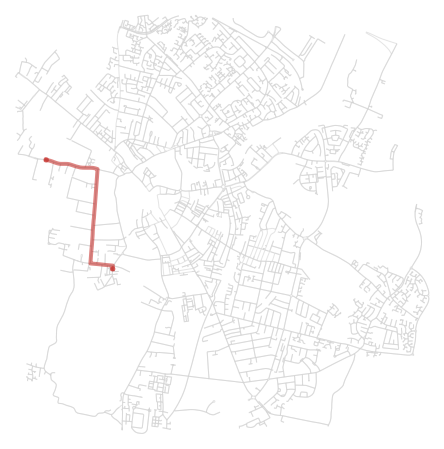

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


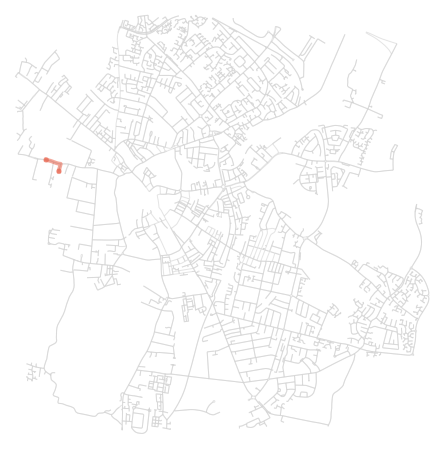

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


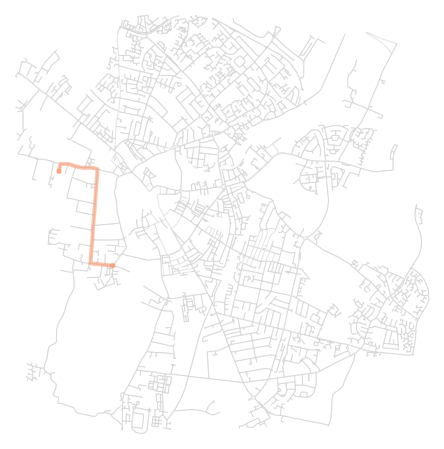

In [20]:
G2=ox.graph_from_address('Mill Road Cemetery,Cambridge',dist=3500,network_type='drive')
for i in range(3):
    origin_point = origin_list2[i]
    destination_point = destination_list2[i]
    origin_node = ox.get_nearest_node(G2, origin_point)
    destination_node = ox.get_nearest_node(G2, destination_point)
    route = nx.shortest_path(G2, origin_node, destination_node, 
                             weight='length')
    route_list.append(route)
    color_list = list(sns.color_palette("OrRd", 5))[2:]
    color_list.reverse()
    fig, ax = ox.plot_graph_route(G2, route,
                                  edge_color='lightgrey', 
                                  bgcolor='w', edge_alpha=0.6, 
                                  node_color='none',edge_linewidth=1, 
                                  node_size=1, route_color = color_list[i],
                                  orig_dest_size=30)
    fig.savefig("figure/CW1/2-%s.png"%i, bbox_inches='tight', pad_inches=0, dpi=300)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


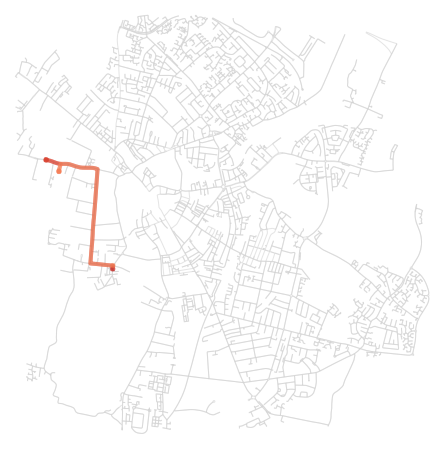

In [21]:
route_list = []
for i in range(3):
    origin_point = origin_list2[i]
    destination_point = destination_list2[i]
    origin_node = ox.get_nearest_node(G2, origin_point)
    destination_node = ox.get_nearest_node(G2, destination_point)
    route = nx.shortest_path(G2, origin_node, destination_node, 
                             weight='length')
    route_list.append(route)
color_list = list(sns.color_palette("OrRd", 5))[2:]
color_list.reverse()
# plot the route showing origin/destination lat-long points   
fig, ax = ox.plot_graph_routes(G2, route_list, edge_color='lightgrey', 
                               bgcolor='w', edge_alpha=0.6, 
                               node_color='none',edge_linewidth=1, 
                               node_size=1, route_colors = color_list,
                               orig_dest_size=30)
fig.savefig("figure/CW1/all-2.png", bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

### Calculation of displacement

In [22]:
total_distance = 0
route_length_list = []
for i in range(8):
    origin_point = origin_list[i]
    destination_point = destination_list[i]
    origin_node = ox.get_nearest_node(G1, origin_point)
    destination_node = ox.get_nearest_node(G1, destination_point)
    route = nx.shortest_path(G1, origin_node, destination_node, 
                             weight='length')
    route_length = nx.shortest_path_length(G1, origin_node, 
                                           destination_node, weight='length')
    route_length_list.append(route_length)
    total_distance += route_length
print('total distance:',total_distance,
      '\naverage displacement:',total_distance/8,
      '\nmaximum displacement:',max(route_length_list),
      '\nroute length list:',route_length_list)

total distance: 16034.407000000005 
average displacement: 2004.3008750000006 
maximum displacement: 7078.151000000001 
route length list: [7078.151000000001, 1931.1610000000003, 1832.8069999999998, 1395.759, 303.174, 402.351, 2025.495, 1065.509]


In [23]:
total_distance = 0
route_length_list = []
for i in range(3):
    origin_point = origin_list2[i]
    destination_point = destination_list2[i]
    origin_node = ox.get_nearest_node(G2, origin_point)
    destination_node = ox.get_nearest_node(G2, destination_point)
    route = nx.shortest_path(G2, origin_node, destination_node, 
                             weight='length')
    route_length = nx.shortest_path_length(G2, origin_node, 
                                           destination_node, weight='length')
    route_length_list.append(route_length)
    total_distance += route_length
print('total distance:',total_distance,
      '\naverage displacement:',total_distance/3,
      '\nmaximum displacement:',max(route_length_list),
      '\nroute length list:',route_length_list)

total distance: 6045.994000000001 
average displacement: 2015.3313333333335 
maximum displacement: 2920.3190000000004 
route length list: [2920.3190000000004, 383.85400000000004, 2741.821]


### 2.2.3. Comparative analysis of check-in frequencies and network centrality

Describe the general pattern of user check-ins in the Gowalla dataset in relation to closeness centrality measure for the City of Cambridge, UK, using whatever visual aids you see as fitting to your analysis. Comment on any observable trends which you find most noticeable and/or interesting.


In [24]:
# some of the centrality measures are not implemented on multiGraph so first set as diGraph
DG = ox.get_digraph(G)
edge_cc = nx.closeness_centrality(nx.line_graph(DG))
edge_bc = nx.betweenness_centrality(nx.line_graph(DG))
edge_dc = nx.degree_centrality(nx.line_graph(DG))
# set or inscribe the centrality measure of each node as an edge attribute of the graph network object
nx.set_edge_attributes(DG, edge_cc,'cc')
nx.set_edge_attributes(DG, edge_bc,'bc')
nx.set_edge_attributes(DG, edge_dc,'dc')
G_base = nx.MultiGraph(DG)

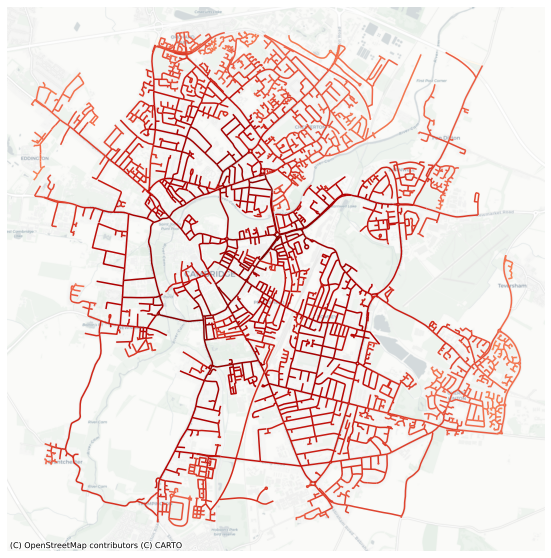

In [25]:
# convert graph to geopandas dataframe
gdf_edges = ox.graph_to_gdfs(G_base,nodes=False,
                             fill_edge_geometry=True)

# set crs to 3857 (needed for contextily)
gdf_edges = gdf_edges.to_crs(epsg=3857) # setting crs to 3857

# plot edges according to closeness centrality
ax=gdf_edges.plot('cc',cmap='OrRd',figsize=(10,10))

# add a basemap using contextilly
import contextily as ctx
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
plt.axis('off')
plt.show()

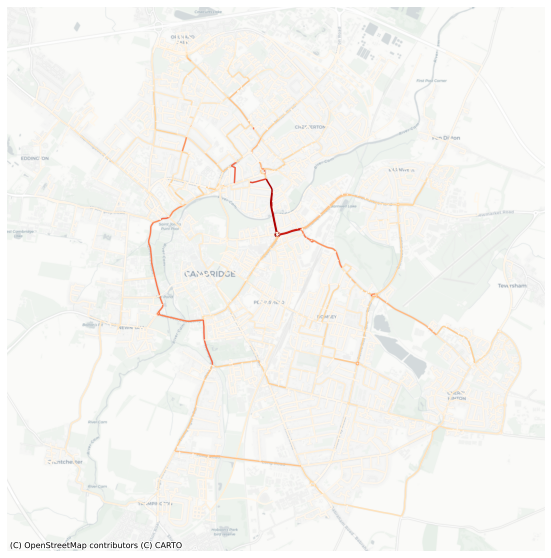

In [26]:
# convert graph to geopandas dataframe
gdf_edges = ox.graph_to_gdfs(G_base,nodes=False,
                             fill_edge_geometry=True)

# set crs to 3857 (needed for contextily)
gdf_edges = gdf_edges.to_crs(epsg=3857) # setting crs to 3857
# plot edges according to closeness centrality
ax=gdf_edges.plot('bc',cmap='OrRd',figsize=(10,10))

# add a basemap using contextilly
import contextily as ctx
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
plt.axis('off')
plt.savefig("figure/CW1/bc.png", bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

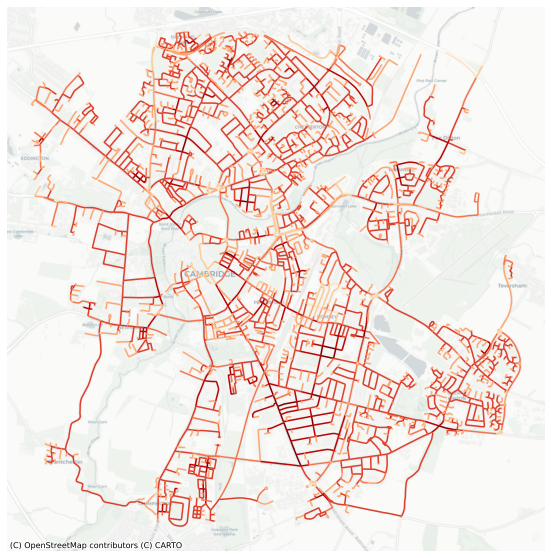

In [27]:
# convert graph to geopandas dataframe
gdf_edges = ox.graph_to_gdfs(G_base,nodes=False,
                             fill_edge_geometry=True)

# set crs to 3857 (needed for contextily)
gdf_edges = gdf_edges.to_crs(epsg=3857) # setting crs to 3857

# plot edges according to closeness centrality
ax=gdf_edges.plot('dc',cmap='OrRd',figsize=(10,10))

# add a basemap using contextilly
import contextily as ctx
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
plt.axis('off')
plt.show()

### Overall Pattern

In [28]:
nodes = []
location = []
for i in range(len(df)):
    lat = df.iloc[i]['lat']
    lon = df.iloc[i]['lon']
    point = (lat, lon)
    node = ox.get_nearest_node(G, point)
    location.append(point)
    nodes.append(node)

In [29]:
my_map = Map([52.204, 0.123], zoom_start=13)
# Add markers for each point
for p in location:
        marker = Marker(p) # Creating a new marker
        icon = Icon(color='red')
        icon.add_to(marker) # Setting the marker's icon color 
        marker.add_to(my_map)
my_map

In [30]:
G=ox.graph_from_address('Mill Road Cemetery,Cambridge',dist=3500,network_type='drive')
DG = ox.get_digraph(G)

In [31]:
counts = {}         
for x in nodes:            
    if x in counts:
        counts[x] += 1
    else:
        counts[x] = 1

for x in list(DG.nodes):
    if x not in nodes:
        counts[x] = 0
    else:
        pass

len(counts)

3432

In [32]:
import math
for x in counts:
    if counts[x] != 0:
        counts[x] = math.log2(counts[x]+5)
    else:
        pass
for x in counts:
    if counts[x] != 0:
        counts[x] = math.log10(counts[x])
    else:
        pass

In [33]:
nx.set_node_attributes(DG,name='counts', values=counts)
G_count = nx.MultiGraph(DG)
G_count.nodes(data=True)

NodeDataView({104521: {'y': 52.2035316, 'x': 0.123448, 'highway': 'traffic_signals', 'street_count': 3, 'counts': 0.8032899213803919}, 104522: {'y': 52.204034, 'x': 0.1230336, 'street_count': 3, 'counts': 0.6020599913279624}, 104527: {'y': 52.2084108, 'x': 0.1185074, 'street_count': 2, 'counts': 0.5806233636823456}, 104534: {'y': 52.2073645, 'x': 0.123506, 'street_count': 3, 'counts': 0.4124542472953374}, 104541: {'y': 52.2091974, 'x': 0.1175301, 'highway': 'mini_roundabout', 'street_count': 3, 'counts': 0.628177097343645}, 104542: {'y': 52.2104012, 'x': 0.1182966, 'street_count': 4, 'counts': 0.6492795087974104}, 104543: {'y': 52.21005, 'x': 0.1191437, 'street_count': 3, 'counts': 0}, 104549: {'y': 52.2032677, 'x': 0.1223378, 'street_count': 3, 'counts': 0.47712125471966244}, 104550: {'y': 52.2028319, 'x': 0.1206122, 'street_count': 3, 'counts': 0.5390047504787536}, 104551: {'y': 52.2019205, 'x': 0.1180646, 'street_count': 4, 'counts': 0.5544846172381138}, 104552: {'y': 52.2024003, 'x

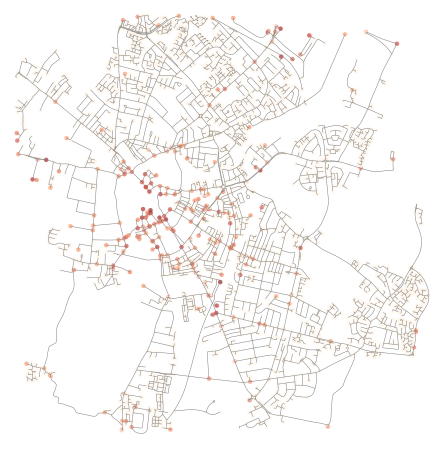

In [34]:
nc = ox.plot.get_node_colors_by_attr(G_count, 'counts', cmap='OrRd')
fig, ax = ox.plot_graph(G_count, node_size=20, node_color=nc, 
                        node_edgecolor='none', bgcolor='w',
                        edge_color='grey', edge_linewidth=0.5, 
                        edge_alpha=1,node_alpha=0.6,node_zorder=0)
fig.savefig("figure/CW1/count.png", bbox_inches='tight', pad_inches=0, dpi=300)

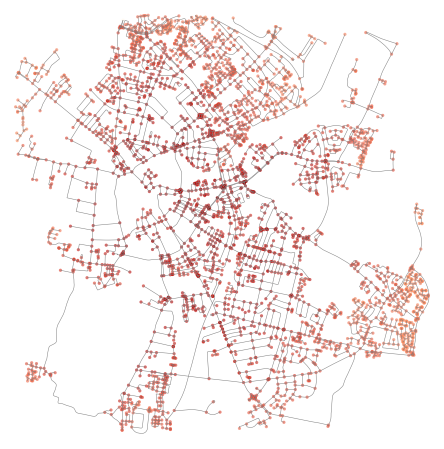

In [35]:
node_cc = nx.closeness_centrality(DG)
# set the attributes back to its edge
nx.set_node_attributes(DG, node_cc,'cc')
# and turn back to multiGraph for plotting
Gn = nx.MultiGraph(DG)
nc = ox.plot.get_node_colors_by_attr(Gn, 'cc', cmap='OrRd')
fig, ax = ox.plot_graph(Gn, node_size=10, node_color=nc, 
                        node_edgecolor='none', bgcolor='w',
                        edge_color='grey', edge_linewidth=0.5, 
                        edge_alpha=1,node_alpha=0.6,node_zorder=0)
fig.savefig("figure/CW1/closeness.png", bbox_inches='tight', pad_inches=0, dpi=300)

### 2.2.4 Urban Planning Application Question

Imagine that you were taking the role of a consultant to the authorities in Cambridge responsible for urban planning. Choose one of the following urban features and propose a new location where you would build that feature: museum, shopping mall, fire station, community park. Use the outputs of your analysis from the task above (2.2.3) and any relevant knowledge of the local area to justify your decision.

Note: You do not have to do any further analysis/ visualisation by code. However, if you feel like your response could benefit from further analysis, you can choose to briefly describe what accompanying analysis you would undertake.